In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score , classification_report


In [10]:
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
x = data.drop('species', axis=1)
y = data['species']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
def choose_k(xtrain, ytrain,xtest,ytest,max_k):
    k_values = list(range(1,max_k+1))
    accuracy_values =[]

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtrain,ytrain)
        y_pred= knn.predict(xtest)
        accuracy = accuracy_score(ytest,y_pred)
        accuracy_values.append(accuracy)

    plt.figure(figsize=(10,6))
    plt.plot(k_values,accuracy_values,Markdown='o')
    plt.title('Accuracy vs  Number (k)')
    plt.xlabel('number of')
    plt.ylabel("accuracy") 
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k =k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

AttributeError: Line2D.set() got an unexpected keyword argument 'Markdown'

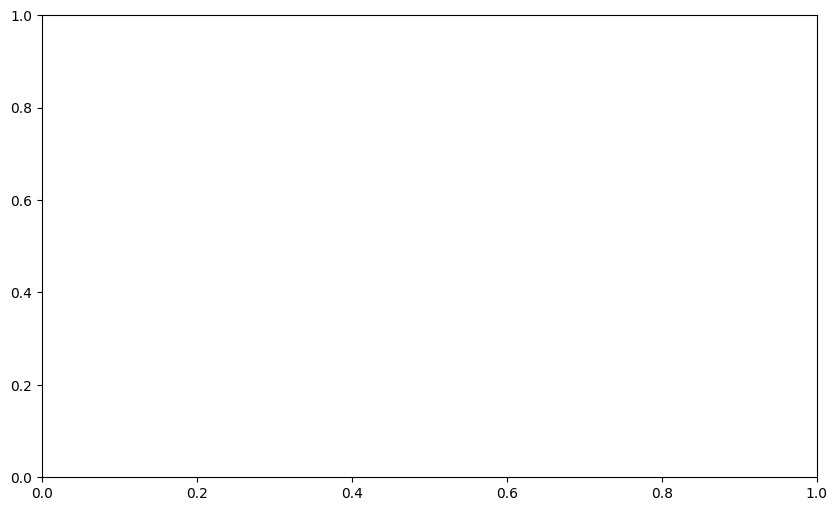

In [21]:
best_k=choose_k(xtrain,ytrain,xtest,ytest,max_k=1)
print("best k:",best_k)